# Import libraries

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Part 1: Data Loading and Preprocessing

In [8]:
# Load the Dataset
df = pd.read_csv('onlinefoods.csv')
df.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


In [9]:
# Handle Missing Values
df.isna().sum()

Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
Feedback                      0
Unnamed: 12                   0
dtype: int64

In [10]:
#  Encode Categorical Variables
df_dummies = pd.get_dummies(df, drop_first=True)

In [11]:
# Feature Selection
X = df_dummies[['Pin code','Age', 'Family size', 'Gender_Male', 'Marital Status_Single', 'Occupation_House wife', 'Occupation_Self Employeed', 'Occupation_Student', 'Monthly Income_25001 to 50000', 'Monthly Income_Below Rs.10000', 'Monthly Income_More than 50000', 'Monthly Income_No Income', 'Educational Qualifications_Ph.D', 'Educational Qualifications_Post Graduate', 'Educational Qualifications_School', 'Educational Qualifications_Uneducated']]
Y = df_dummies['Feedback_Positive']

# Part 2: Exploratory Data Analysis (EDA)

In [12]:
# Descriptive Statistics
df.describe()

,Age,Family size,latitude,longitude,Pin code
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,24.628866,3.280928,12.972058,77.600160,560040.113402
std,2.975593,1.351025,0.044489,0.051354,31.399609
min,18.000000,1.000000,12.865200,77.484200,560001.000000
25%,23.000000,2.000000,12.936900,77.565275,560010.750000
50%,24.000000,3.000000,12.977000,77.592100,560033.500000
75%,26.000000,4.000000,12.997025,77.630900,560068.000000
max,33.000000,6.000000,13.102000,77.758200,560109.000000


**Visualizations**

<ipython-input-13-751fb83e4326>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Feedback', y='Age', data=df, palette='pastel')


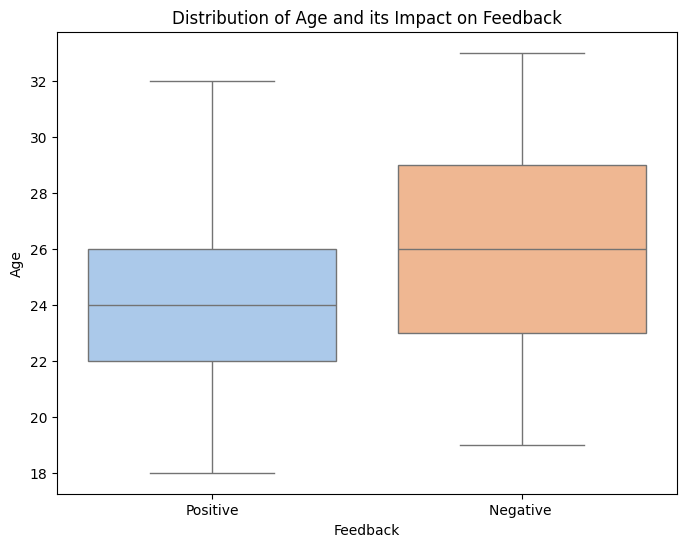

In [13]:
# Distribution of Age and its impact on Feedback.
plt.figure(figsize=(8, 6))
sns.boxplot(x='Feedback', y='Age', data=df, palette='pastel')
plt.title("Distribution of Age and its Impact on Feedback")
plt.xlabel("Feedback")
plt.ylabel("Age")
plt.show()

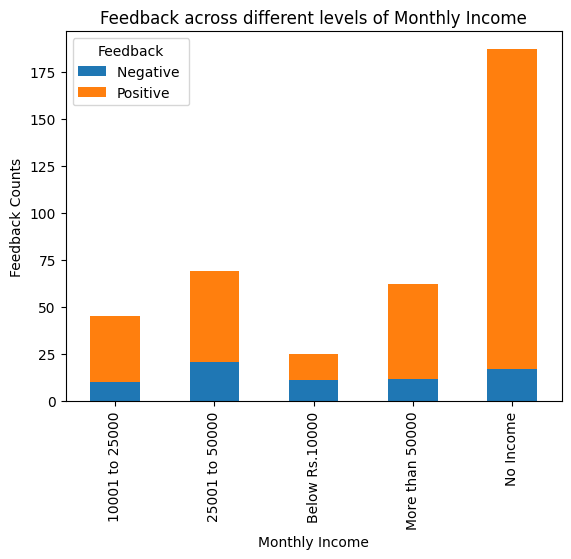

In [14]:
# Proportions of Feedback across Different Levels of Monthly Income
income_feedback_counts = df.groupby("Monthly Income")["Feedback"].value_counts().unstack()
income_feedback_counts.plot(kind="bar", stacked=True)
plt.title("Feedback across different levels of Monthly Income")
plt.xlabel("Monthly Income")
plt.ylabel("Feedback Counts")
plt.show()

<ipython-input-15-645098456337>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


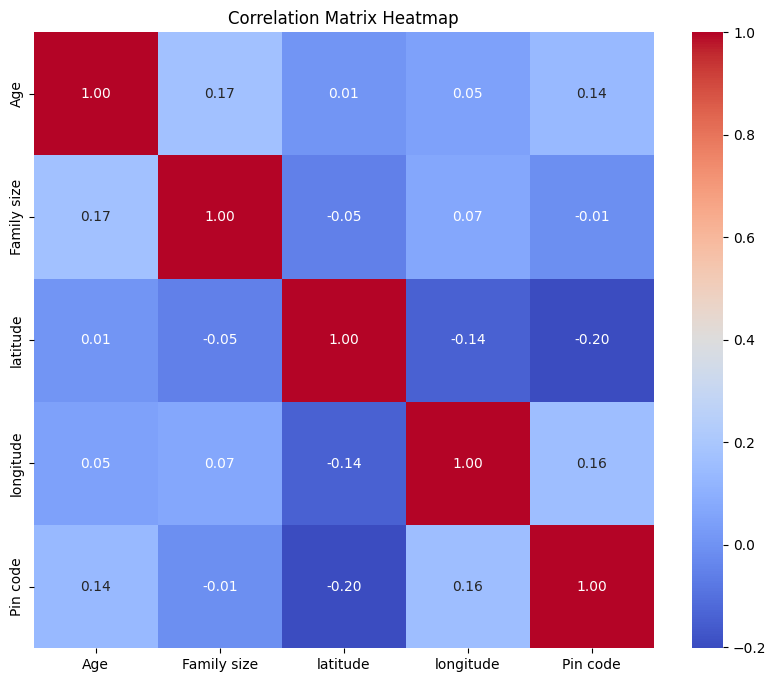

In [15]:
# Correlation Matrix Heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

# Part 3: Logistic Regression Model

**Build the model**

In [16]:
# Split the data
X_train,X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [17]:
# Standardize the Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [18]:
# Train the model
model = LogisticRegression()
model.fit(X_train_scaled, Y_train)

LogisticRegression()

In [19]:
# Predict on the Test Set
Y_pred = model.predict(X_test_scaled)

**Model Evaluation**

In [20]:
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
confusion = confusion_matrix(Y_test, Y_pred)

print(f'Accuracy          :  {accuracy}')
print(f'Precision         :  {precision}')
print(f'Recall            :  {recall}')
print(f'Confusion Matrix  :  \n{confusion}')

Accuracy          :  0.8461538461538461
Precision         :  0.8666666666666667
Recall            :  0.9701492537313433
Confusion Matrix  :  
[[ 1 10]
 [ 2 65]]


# Part 4: Data Analysis and Visualization


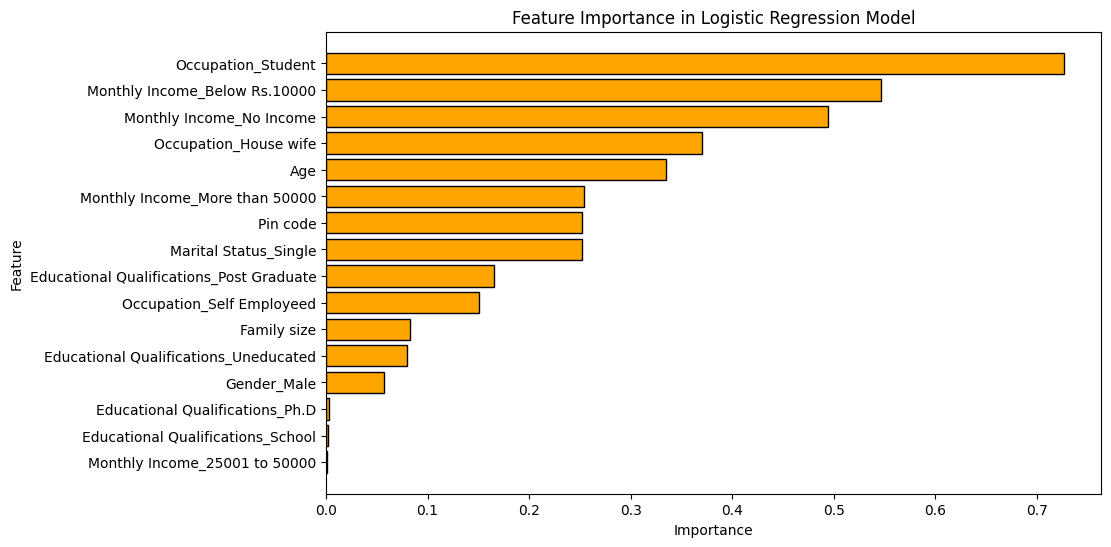

                                     Feature  Importance
7                         Occupation_Student    0.727016
9              Monthly Income_Below Rs.10000    0.546415
11                  Monthly Income_No Income    0.494649
5                      Occupation_House wife    0.369906
1                                        Age    0.334914
10            Monthly Income_More than 50000    0.254326
0                                   Pin code    0.252606
4                      Marital Status_Single    0.251742
13  Educational Qualifications_Post Graduate    0.165472
6                  Occupation_Self Employeed    0.150347
2                                Family size    0.082490
15     Educational Qualifications_Uneducated    0.080132
3                                Gender_Male    0.057542
12           Educational Qualifications_Ph.D    0.003259
14         Educational Qualifications_School    0.001609
8              Monthly Income_25001 to 50000    0.001391


In [26]:
# Feature Importance
feature_importance = np.abs(model.coef_[0])
feature_names = X.columns

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='orange', edgecolor='black')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Logistic Regression Model')
plt.gca().invert_yaxis()
plt.show()

print(feature_importance_df)

In [ ]:
# Prediction Insights
prob = model.predict_proba(X_test)[:, 1]
plt.hist(prob, bins=20, color='orange', edgecolor='black')
plt.title('Distribution of Predicted Probabilities')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
